## Övning 2.6

Uppgiften lyder
<img src="img/exe2.6.png">

Vi börjar med att fasttälla medelvärde.

In [1]:
from math import *
stickprov = [9.88,10.18,10.23,10.39,10.21]

In [2]:
summa = 0.0
antal = 0
for punkt in stickprov:
    summa += punkt
    antal += 1
medel = summa/antal
print medel

10.178


Sedan räknar vi ut standardavvikelsen av stickprovet

In [3]:
kvadrat_summa = 0.0
for punkt in stickprov:
    kvadrat_summa += (punkt-medel)**2
varians=kvadrat_summa/(antal-1)
standardavvikelse = sqrt(varians)
print standardavvikelse

0.18539147769


Vi tar sedan reda på $t^{0.975}_4$ för att använda i 2-sidig konfidensintervalls bestämning för 95% intervall. Vi skulle även kunnat använda tabellen A.2 i Apendix A för att bestämma det här värdet.

In [4]:
from scipy.stats import t
t95 = t.ppf(0.975,antal-1)
print t95

2.7764451052


In [5]:
upp = medel + standardavvikelse*t95/sqrt(antal)
ner = medel - standardavvikelse*t95/sqrt(antal)
print "95%% konfidensintervallet för medelvärdet ligger från %f till %f" % (ner,upp)

95% konfidensintervallet för medelvärdet ligger från 9.947806 till 10.408194


Det 95%-iga konfidensintervallet inkluderar 10 ml, så vi kan inte se bevis för systematiska fel.

### Visualisering

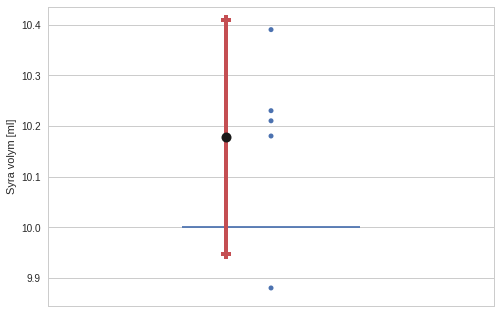

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame(stickprov,columns=["Syra volym [ml]"])
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(data=df,y="Syra volym [ml]")
plt.plot([-0.1,-0.1],[upp,ner],'r-',marker='P',ms=10,lw=4)
plt.plot(-0.1,medel,'k+',marker='.',ms=20)
plt.hlines(10.0,-.2,.2,colors='b')


### Lösning med t-test

Vi kan även använda ett t-test för att undersöka om data skiljer sig signifikat åt från önskat värde ($10.0$).
Vi använder oss av ekvation (3.2.1) 

In [7]:
tv = (medel-10.0)*sqrt(antal)/standardavvikelse
tv

2.1469169184841514

In [8]:
t.ppf(1-0.05/2,antal-1)

2.7764451051977987

In [9]:
p=2*t.sf(tv,antal-1)
p

0.098321188003634472